# Studying data of Police data set through visualization.

In [1]:
# First we will upload elementary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Then comes the data, we're making copy of our original data set and work with it
df1=pd.read_csv("police_train.csv")
df=df1.copy()

In [3]:
# Okay, now that we've got the data, let's look at what the dataset is about.

# Data Overview

In [4]:
# Using the head () function we can see the first 5 rows of our data set
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

We have data on age, race, gender, country, city, whether they fled during the arrest and whether they had a history of mental illness. As we may see, only two features of our dataset are numerical. 
Let's analyze the data.


In [7]:
# Is there any NaN value?
# function to identify missing value from all features
def missing_values (dataset):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False))
    missing_values= pd.concat([total,percent], axis=1, keys= ['Total', 'Percent'])
    return missing_values
print('Missing Values from Police data set')
print()
print (missing_values (df))

Missing Values from Police data set

                         Total   Percent
race                       521  9.619645
flee                       249  4.597489
age                        235  4.338996
armed                      227  4.191285
gender                       2  0.036928
body_camera                  0  0.000000
threat_level                 0  0.000000
signs_of_mental_illness      0  0.000000
state                        0  0.000000
city                         0  0.000000
manner_of_death              0  0.000000
date                         0  0.000000
name                         0  0.000000
id                           0  0.000000


As we can conclude, the percentage of NaN values is low, so we have several options on how to solve this problem.
We can simply drop certain rows that have NaN values or replace them with the mean values from that column.

In [8]:
# Filling missing flee values with most common value
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [9]:
#Filling missing values of age with mean age value
medianAge=df.age.median()
df['age'].fillna(medianAge, inplace=True)
df['age']=df['age'].astype(int)


In [10]:
# Since the armed column has a udeterminated value, we put all missing values in that category
print(df['armed'].value_counts())

gun                                 3060
knife                                792
unarmed                              353
toy weapon                           186
undetermined                         164
                                    ... 
baseball bat and fireplace poker       1
metal rake                             1
wasp spray                             1
metal hand tool                        1
oar                                    1
Name: armed, Length: 93, dtype: int64


In [11]:
df['armed'].fillna('undeterminated', inplace=True)


In [12]:
# Discribing thr race column and making it more readable

df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [13]:
df.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df.replace(to_replace = ['B'], value = ['Black'], inplace = True)
df.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df.replace(to_replace = ['W'], value = ['White'], inplace = True)
print(df['race'].value_counts())

White              2476
Black              1298
Hispanic            902
Asian                93
Native American      78
Other                48
Name: race, dtype: int64


In [14]:
# Putting all missing values in Other category
df['race'].fillna('Other', inplace=True)

In [15]:
# Filling missing flee values with most common value
df['flee'] = df['flee'].fillna(df['flee'].mode()[0])

In [16]:
# We arrange the date column into 2 special columns month and year 
df['year']=pd.to_datetime(df['date']).dt.year
df['month']=pd.to_datetime(df['date']).dt.month

In [17]:
# Let us take a look of our data set now
df.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,White,Aloha,OR,False,attack,Not fleeing,False,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1


In [18]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
year                       0
month                      0
dtype: int64

As we can see there is any missing values in our df, let explore it a little bit.

# EXPLORATORY

Text(0.5, 1.0, 'Total number of people killed, by race')

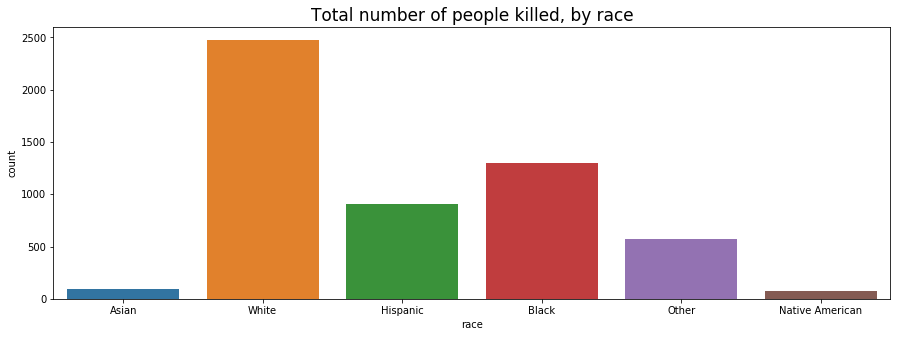

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="race")

plt.title("Total number of people killed, by race", fontsize=17)


The dataset divides race into Asian, White, Hispanic, Black, Native American and Other.
From the bar chart we can see that the overwhelming majority being killed by police is either White, Hispanic or Black, with White being the race with the largest amount of victims. This makes sense since White is the largest racial group in the US, followed by Black and Hispanic.

Text(0.5, 1.0, 'Total number of people killed, by gender')

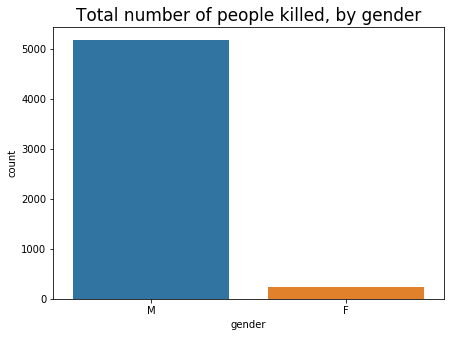

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="gender")

plt.title("Total number of people killed, by gender", fontsize=17)

In [21]:
# Lets count percent of male cases

female = df[df["gender"] == "F"].gender.count()
male = df[df["gender"] == "M"].gender.count()
perc_male = (male*100)/(male+female) 

print (str(perc_male) + "% " + "of the victims are male.")

95.6056129985229% of the victims are male.


As we might see from percents and bar chart, men are the majority subjects of our dataset.

Text(0.5, 1.0, 'Age distribution')

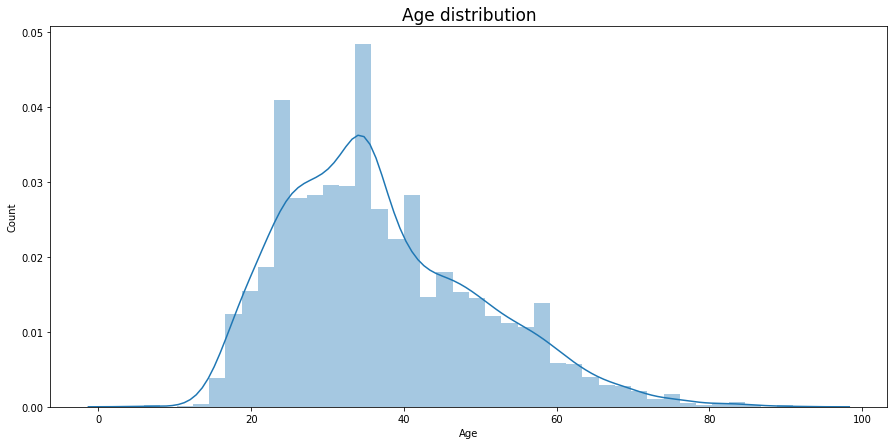

In [22]:
# Age distribution

plt.figure(figsize=(15,7))
age_dist = sns.distplot(df["age"], bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.title("Age distribution", fontsize=17)

In [23]:
df.age.mean()

37.02603397341211

The mean value of age is 37, most cases are in between 20 and 45

Text(0.5, 1.0, 'Number of police killings, by state')

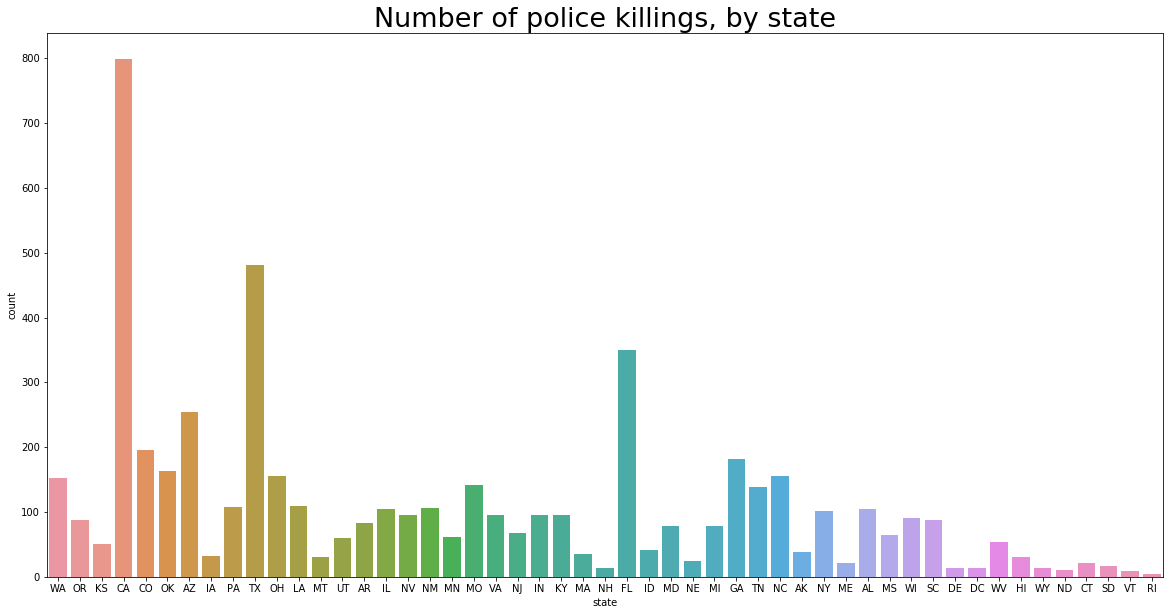

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df.state)
plt.title("Number of police killings, by state", fontsize=27)

California, Texas and Florida are the states in which police killings are most frequent. But these are also the three most populous states in the US.

Text(0.5, 1.0, 'Most dangerous cities')

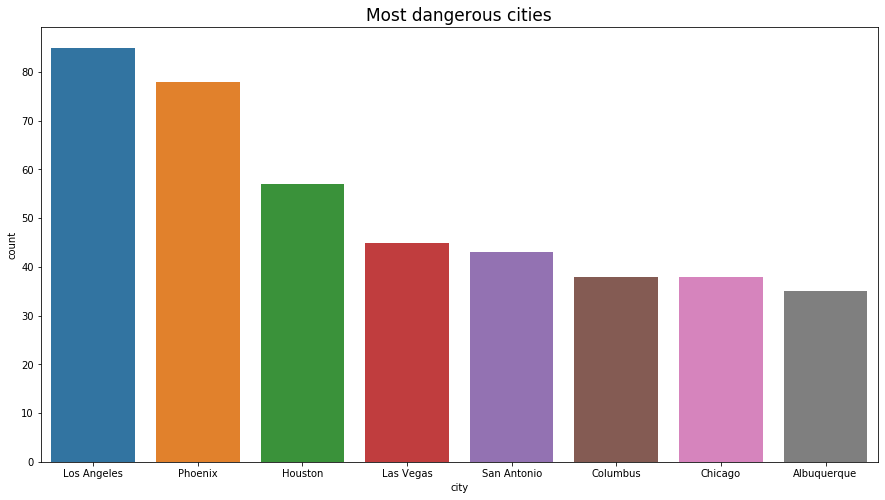

In [25]:
city = df.city.value_counts(ascending=False)

df_city = df.filter(["city"], axis=1)
df_city["count"] = 1

grouped_city = df_city.groupby("city", as_index=False,sort=False).sum()
grouped_city.sort_index(ascending=False)

grouped_city = grouped_city.sort_values("count", ascending=False).head(8)                                                       

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_city, x="city", y="count")
plt.title("Most dangerous cities", fontsize=17)

From this plot we may see that LA, Phoenix and Houston are cities with most police shootings.

Text(0.5, 1.0, 'Most common ways of being armed')

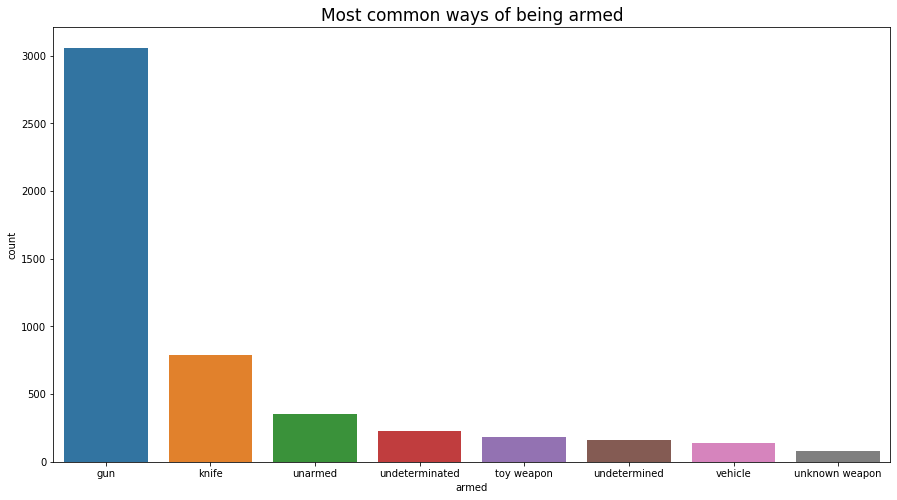

In [26]:
armed = df.armed.value_counts(ascending=False)

df_armed = df.filter(["armed"], axis=1)
df_armed["count"] = 1

grouped_armed = df_armed.groupby("armed", as_index=False,sort=False).sum()
grouped_armed.sort_index(ascending=False)

grouped_armed = grouped_armed.sort_values("count", ascending=False).head(8) 

plt.figure(figsize=(15,8))
sns.barplot(data=grouped_armed, x="armed", y="count")
plt.title("Most common ways of being armed", fontsize=17)

As we can see, the most popular weapon is the gun, among the people who were shot by the police.

Text(0.5, 1.0, 'Threth level')

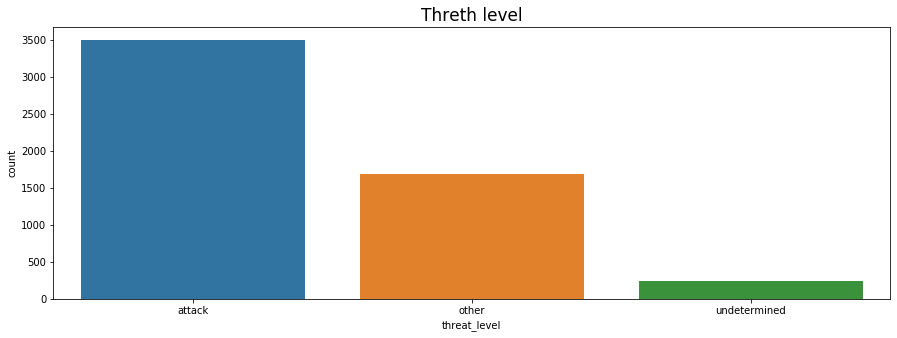

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="threat_level")

plt.title("Threth level", fontsize=17)


Majority threat level is attack.

In [28]:
# Lets count percent of attacks 

attack = df[df["threat_level"] == "attack"].threat_level.count()
other= df[df["threat_level"] == "other"].threat_level.count()
undet=df[df["threat_level"] == "undetermined"].threat_level.count()
perc_attack = (attack*100)/(attack+other+undet) 

print (str(perc_attack) + "% " + "of the victims were attacking.")

64.53101920236337% of the victims were attacking.


Text(0.5, 1.0, 'Manner of death')

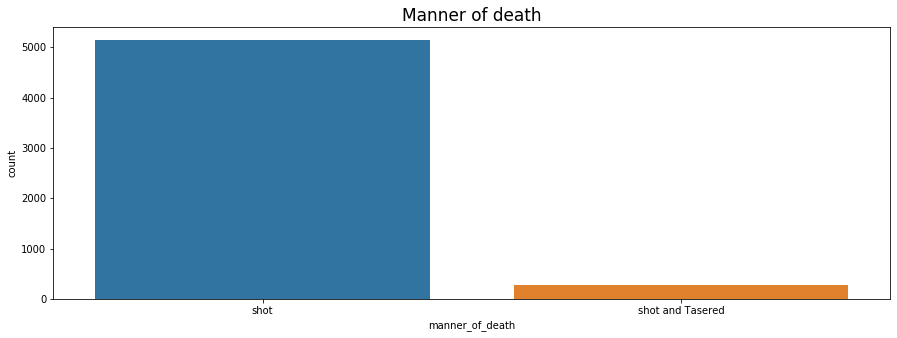

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="manner_of_death")

plt.title("Manner of death", fontsize=17)


In [30]:
# Lets count percent of manner of death

shot = df[df["manner_of_death"] == "shot"].threat_level.count()
tasered= df[df["manner_of_death"] == "shot and Tasered"].threat_level.count()
perc_shot = (shot*100)/(shot+tasered) 

print (str(perc_shot) + "% " + "of the victims were only shot, not tasered first as warning.")

95.01477104874446% of the victims were only shot, not tasered first as warning.


# Let's preprocess our categorical values

In [31]:
# As we see manner of death has only two values, let's map it
df.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [32]:
df['manner_of_death']=df['manner_of_death'].map({'shot':0,'shot and Tasered':1})


In [33]:
# let's take a look of column armed
df.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife',
       'undeterminated', 'shovel', 'hammer', 'hatchet', 'undetermined',
       'sword', 'machete', 'box cutter', 'metal object', 'screwdriver',
       'lawn mower blade', 'flagpole', 'guns and explosives',
       'cordless drill', 'crossbow', 'metal pole', 'Taser', 'metal pipe',
       'metal hand tool', 'blunt object', 'metal stick', 'sharp object',
       'meat cleaver', 'carjack', 'chain', "contractor's level",
       'unknown weapon', 'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', '

In [34]:
# As we can see it has many unique values, let's try to categorize them

lethal = ['gun', 'hatchet', 'machete', 'guns and explosives', 'gun and knife', 'ax', 'hand torch',
          'chain saw', 'hatchet and gun', 'machete and gun', 'chainsaw', 'gun and sword', 'gun and car',
          'incendiary device', 'gun and vehicle', 'vehicle and gun', 'grenade', 'air pistol', 'vehicle and machete']
semilethal = ['nail gun', 'knife', 'shovel', 'hammer', 'sword', 'lawn mower blade', 'cordless drill', 'crossbow', 'Taser',
              'metal object', 'metal hand tool', 'metal stick', 'sharp object', 'meat cleaver', 'bean-bag gun', 'straight edge razor', 
              'baton', 'spear', 'bayonet', 'crowbar', 'tire iron', 'pole and knife', 'pellet gun', 'BB gun', 'samurai sword', 'bow and arrow',
              'wrench', 'BB gun and vehicle', 'Airsoft pistol', 'baseball bat and knife', 'ice pick', 'car, knife and mace']
nonlethal = ['toy weapon', 'box cutter', 'screwdriver', 'flagpole', 'metal pole', 'pick-axe', 'metal rake', 'metal pipe', 
             'blunt object', 'carjack', 'chain', "contractor's level", 'stapler', 'beer bottle', 'baseball bat and fireplace poker',
             'brick', 'baseball bat', 'garden tool', 'scissors', 'pole', 'flashlight', 'vehicle', 'chair', 'pitchfork', 'rock',
             'piece of wood', 'pipe', 'glass shard', 'motorcycle', 'pepper spray', 'oar', 'air conditioner', 'baseball bat and bottle',
             'fireworks', 'pen', 'walking stick', 'barstool', 'wasp spray']
unarmed = ['unarmed']
unknown = ['claimed to be armed', 'unknown weapon']
undetermined = ['undetermined','undeterminated']

In [35]:
## We have divided the types of weapons into 6 subsets, and we use the replace function to combine these new variables in the existing armed column.
for i in df.armed.unique():
    if i in lethal:
        df.armed = df.armed.replace(i, 'Lethal')
    elif i in semilethal:
        df.armed = df.armed.replace(i, 'Semi-Lethal')
    elif i in nonlethal:
        df.armed = df.armed.replace(i, 'Non-Lethal')
    elif i in unarmed:
        df.armed = df.armed.replace(i, 'Unarmed')
    elif i in unknown:
        df.armed = df.armed.replace(i, 'Unknown')
    elif i in undetermined:
        df.armed = df.armed.replace(i, 'Undetermined')

In [36]:
# Now armed colimn has this values

df.armed.unique()

array(['Lethal', 'Unarmed', 'Non-Lethal', 'Semi-Lethal', 'Undetermined',
       'Unknown'], dtype=object)

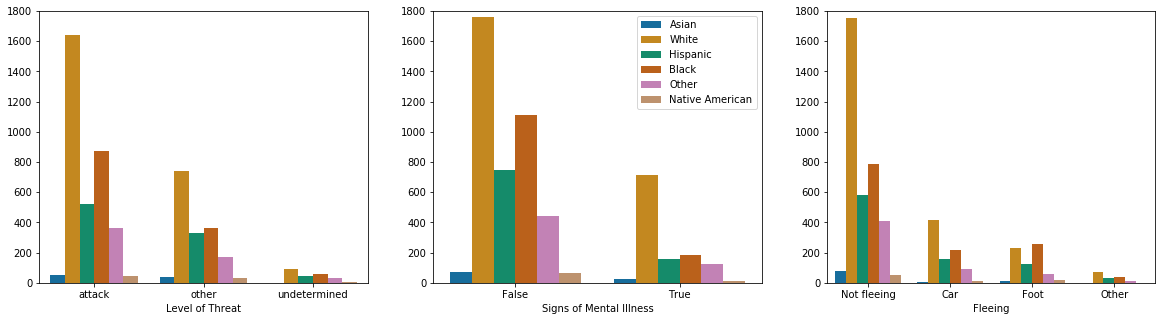

In [37]:
# Let's plot the dependencies between Race and Threat level, Signs of mental illnes and Flee

fig = plt.figure(figsize = (20, 5))


ax1 = fig.add_subplot(1, 3, 1)
ax1 = sns.countplot(x = 'threat_level', hue = 'race', data = df, palette = 'colorblind')
ax1.get_legend().remove()
ax1.set(ylim = (0, 1800))
plt.xlabel('Level of Threat')
plt.ylabel('')

ax2 = fig.add_subplot(1, 3, 2)
ax2 = sns.countplot(x = 'signs_of_mental_illness', hue = 'race', data = df, palette = 'colorblind')
ax2.legend(loc = 'upper right')
ax2.set(ylim = (0, 1800))
plt.xlabel('Signs of Mental Illness')
plt.ylabel('')


ax3 = fig.add_subplot(1, 3, 3)
ax3 = sns.countplot(x = 'flee', hue = 'race', data = df, palette = 'colorblind')
ax3.get_legend().remove()
ax3.set(ylim = (0, 1800))
plt.xlabel('Fleeing')
plt.ylabel('')
plt.show()

As we can see the white class is the most represented and majority were attacking police and not fleeing.

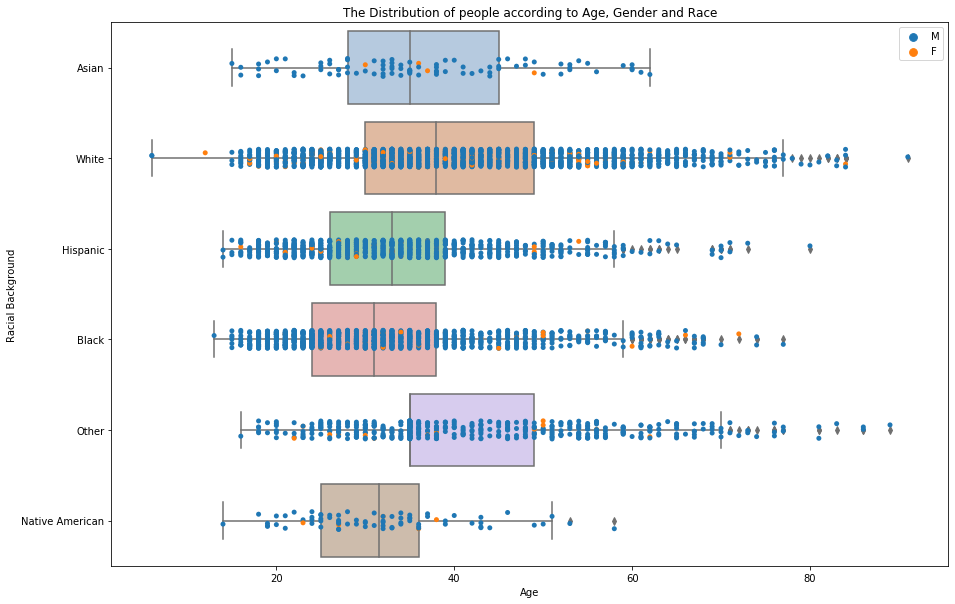

In [38]:
# let's plot the distribution of people according to Age, Gender and Race.

fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.boxplot(x = 'age', y = 'race', data = df, palette = 'pastel', saturation = 0.5)
ax = sns.stripplot(x = 'age', y = 'race', data = df, hue = 'gender')
plt.xlabel('Age')
plt.ylabel('Racial Background')
ax.legend(loc = 'upper right')
plt.title('The Distribution of people according to Age, Gender and Race')
plt.show()

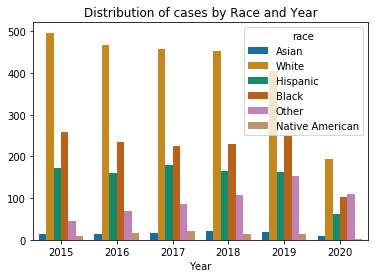

In [39]:
# Let's plot distribution of cases by Race and Year
sns.countplot(x = 'year', hue = 'race', data = df, palette = 'colorblind')
ax.legend(loc = 'upper right')
ax.set(ylim = (0, 550))
plt.xlabel('Year')
plt.ylabel('')
plt.title('Distribution of cases by Race and Year')
plt.show()

Over the years we can notice an increase in criminal behavior in a group that does not belong to any majority racial group.

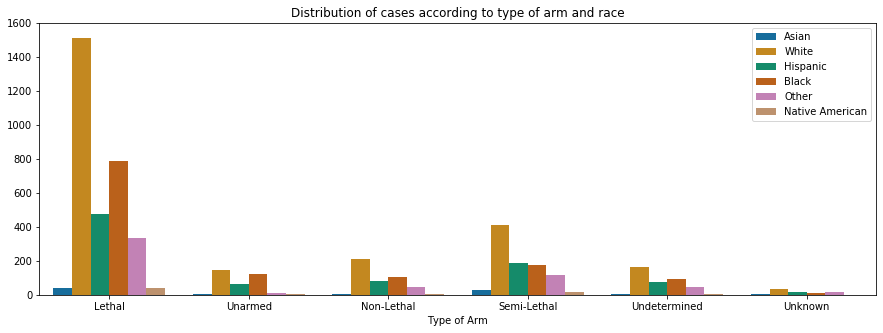

In [40]:
# Let's plot Distribution of cases according to type of arm and race
fig, ax = plt.subplots(figsize = (15, 5))


sns.countplot(x = 'armed', hue = 'race', data = df, palette = 'colorblind')
ax.legend(loc = 'upper right')
ax.set(ylim = (0, 1600))
plt.xlabel('Type of Arm')
plt.ylabel('')
plt.title('Distribution of cases according to type of arm and race')
plt.show()

In the vast majority of cases, in possession was found deadly weapon.

In [41]:
# We first determine 2 subsets
white =['White']
nowhite=['Asian', 'Hispanic', 'Black', 'Other', 'Native American']

In [42]:
# Secondly we replacing them into Race feature
for i in df.race.unique():
    if i in white:
        df.race = df.race.replace(i, 'White')
    elif i in nowhite:
        df.race = df.race.replace(i, 'No White')

In [43]:
# Now we have only two type of race, those that are white and those that aren't.
df.race.unique()

array(['No White', 'White'], dtype=object)

Text(0.5, 1.0, 'Total number of people killed, by race')

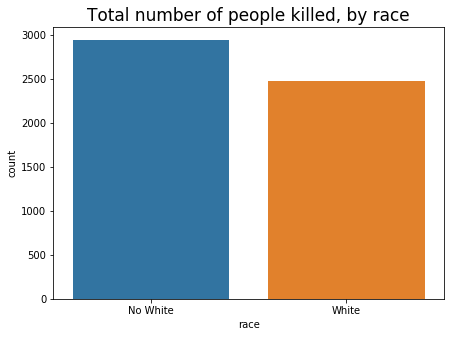

In [44]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="race")

plt.title("Total number of people killed, by race", fontsize=17)

In [45]:
# Lets count difference between races in percents  

no_white = df[df["race"] == "No White"].race.count()
white= df[df["race"] == "White"].race.count()
perc_race = (white*100)/(white+no_white) 

print (str(perc_race) + "% " + "of the victims were white race.")

45.71639586410635% of the victims were white race.


When you look at the overall level, the total number of white victims is less than those who are not, but only for 5%. 
From this data we can't get any confirmation that police killings were racist. 
According to the data, most of the subjects attacked the police, they were mostly armed with a gun, the majority of them were men between 20-45 years old. More frequent police reaction was shooting before warning, according to the data justified.